# Project Name: Stock Market Prediction

### -Vaishnu Rewatkar

In this, we will see how to predict a signal that indicates whether buying a particular stock will be helpful or not

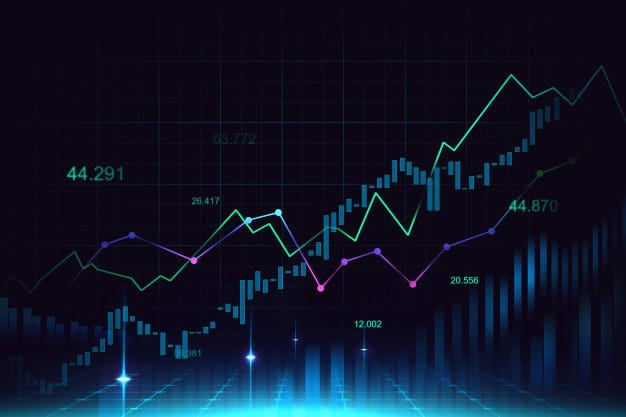

In [3]:
import matplotlib.pyplot as plt
from IPython.display import Image
Image(filename="C:\\Users\\sanjay rewatkar\\Downloads\\0_SaNg8uUaKCMQSS5g.jpg", width=900, height=10)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6


import plotly.graph_objs as go
from plotly.offline import plot

#for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [2]:
display (os.getcwd())

'C:\\Users\\sanjay rewatkar\\Desktop\\codeclause'

In [3]:
os.chdir('C:\\Users\\sanjay rewatkar\\Desktop\\codeclause\\')
display (os.getcwd())

'C:\\Users\\sanjay rewatkar\\Desktop\\codeclause'

In [4]:
df =pd.read_csv("Tesla.csv", header=0)
display (df)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


In [5]:
#reading stock data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [6]:
print(df.shape)

(2416, 7)


In [7]:
# Extracting required columns
df["Date"] = pd.to_datetime(df["Date"])
tesla_df = df[["Date", "Close"]]
tesla_df.index = tesla_df["Date"]
tesla_df.drop("Date", axis=1, inplace=True)
tesla_df.head()

,Close
Date,
2010-06-29,23.889999
2010-06-30,23.830000
2010-07-01,21.959999
2010-07-02,19.200001
2010-07-06,16.110001


In [8]:
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [9]:
df.Open.value_counts()

30.000000     6
28.000000     6
28.500000     5
220.000000    5
360.000000    4
             ..
210.050003    1
205.809998    1
226.009995    1
230.300003    1
673.690002    1
Name: Open, Length: 2132, dtype: int64

In [10]:
df.Open.unique()

array([ 19.      ,  25.790001,  25.      , ..., 632.419983, 640.      ,
       673.690002])

In [11]:
display(df.Open.unique().shape)

(2132,)

In [12]:
df.Open.unique()[0:20]

array([19.      , 25.790001, 25.      , 23.      , 20.      , 16.4     ,
       16.139999, 17.58    , 17.950001, 17.389999, 17.940001, 19.940001,
       20.700001, 21.370001, 21.85    , 20.66    , 20.5     , 21.190001,
       21.5     , 20.91    ])

In [13]:
print(len(df.Open.values))

2416


In [14]:
df.value_counts('Low')

Low
28.000000     6
27.299999     6
203.000000    5
185.000000    4
27.900000     4
             ..
182.089996    1
182.050003    1
181.800003    1
181.500000    1
673.520020    1
Length: 2136, dtype: int64

In [15]:
df.value_counts('High')

High
28.000000     7
30.000000     7
34.500000     7
27.000000     6
34.799999     5
             ..
187.190002    1
186.729996    1
186.679993    1
186.630005    1
786.140015    1
Length: 2128, dtype: int64

In [16]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


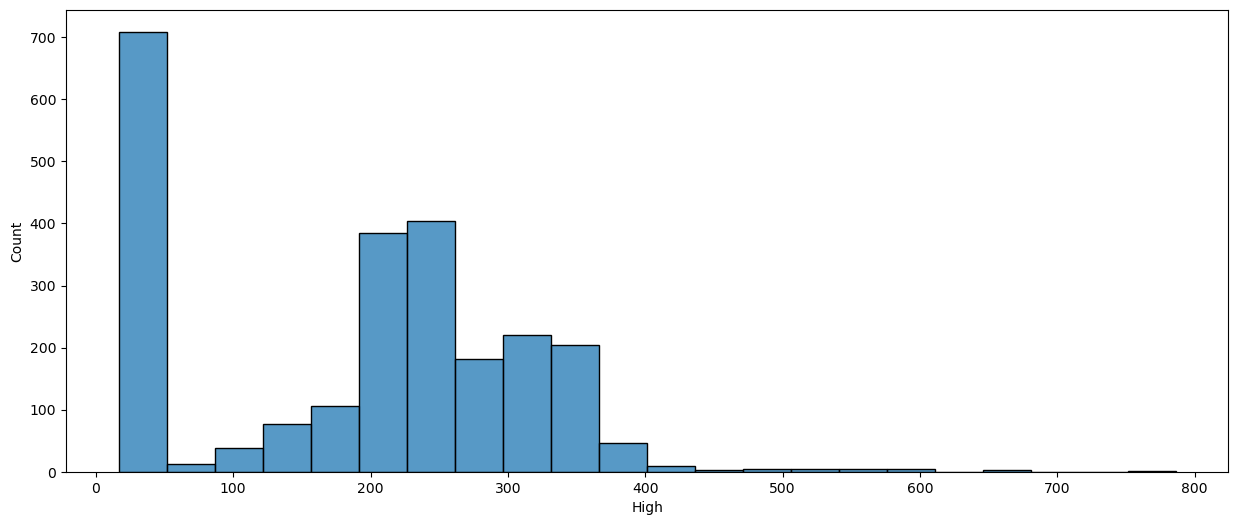

In [17]:
#plotting graph
sns.histplot(df, x ='High')
plt.show()

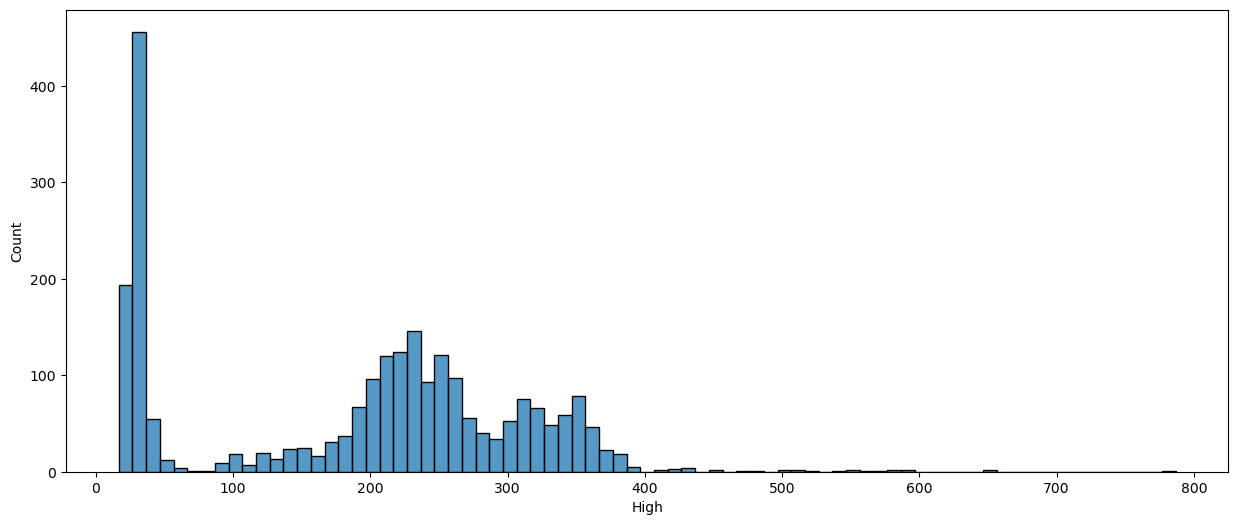

In [18]:
sns.histplot(df, x ='High', binwidth = 10)
plt.show()

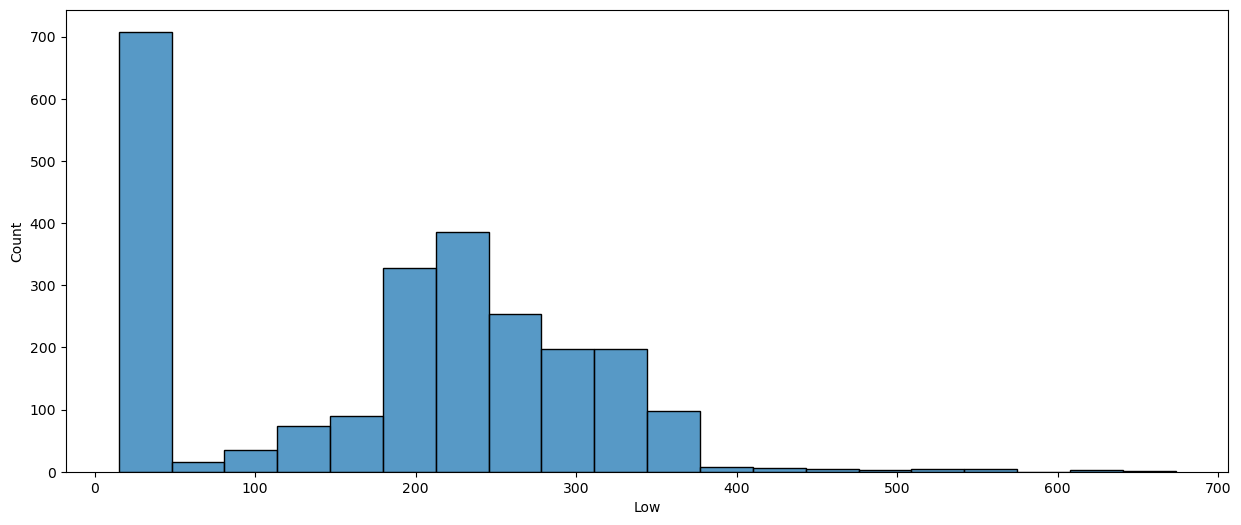

In [19]:
sns.histplot(df, x ='Low')
plt.show()

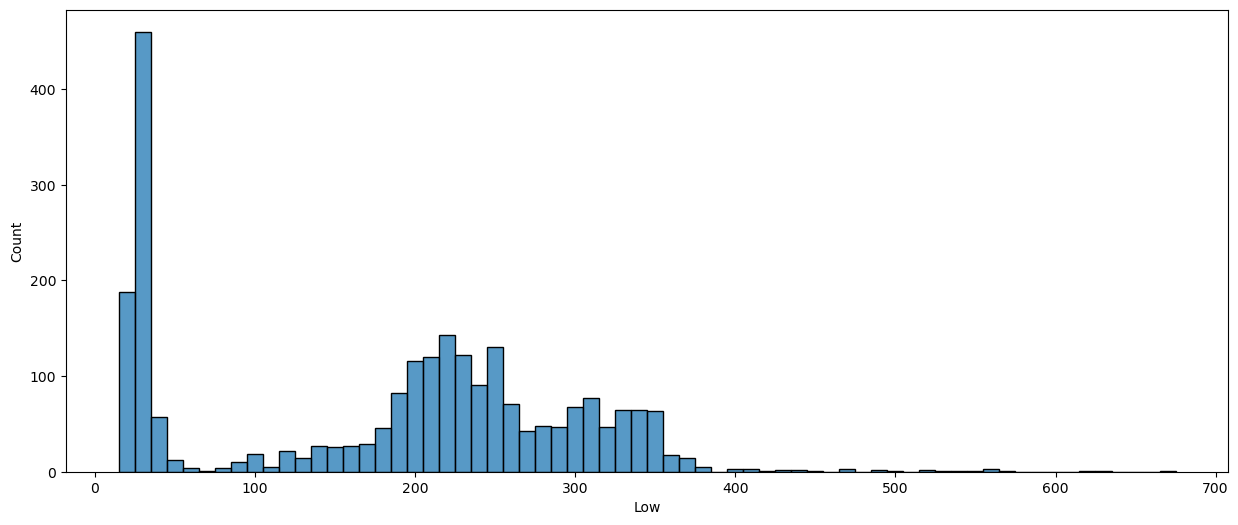

In [20]:
sns.histplot(df, x='Low', binwidth = 10)
plt.show()

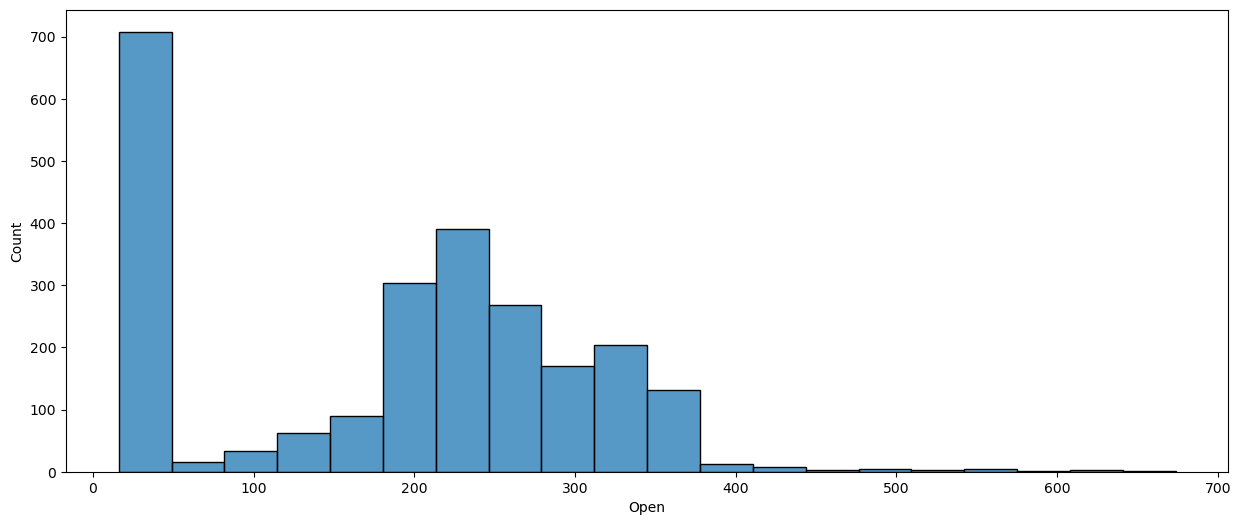

In [21]:
sns.histplot(df, x ='Open')
plt.show()

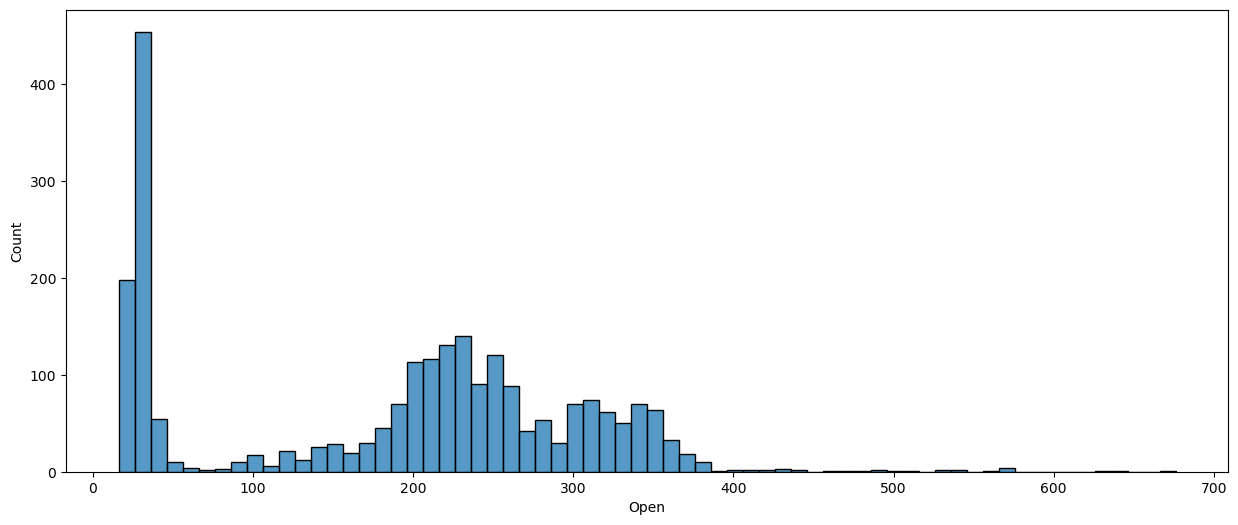

In [22]:
sns.histplot(df, x='Open', binwidth = 10)
plt.show()

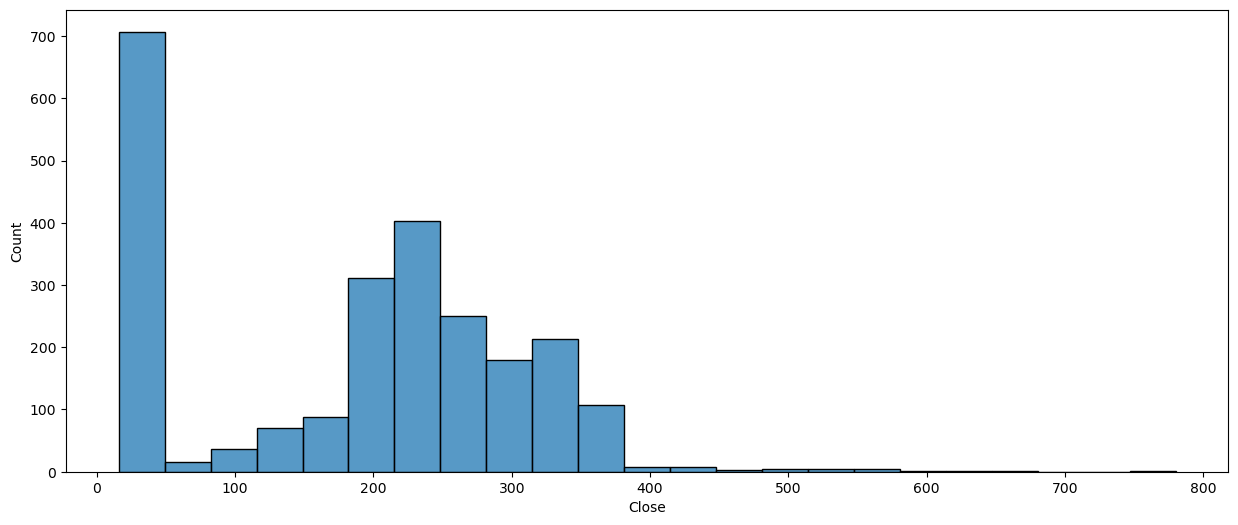

In [23]:
sns.histplot(df, x ='Close')
plt.show()

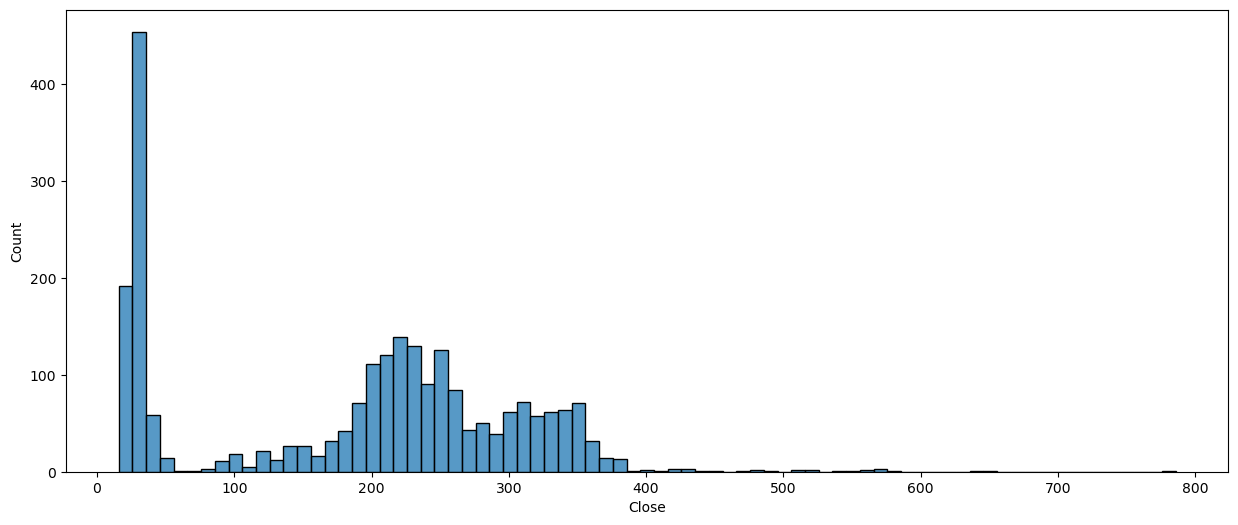

In [24]:
sns.histplot(df, x='Close', binwidth = 10)
plt.show()

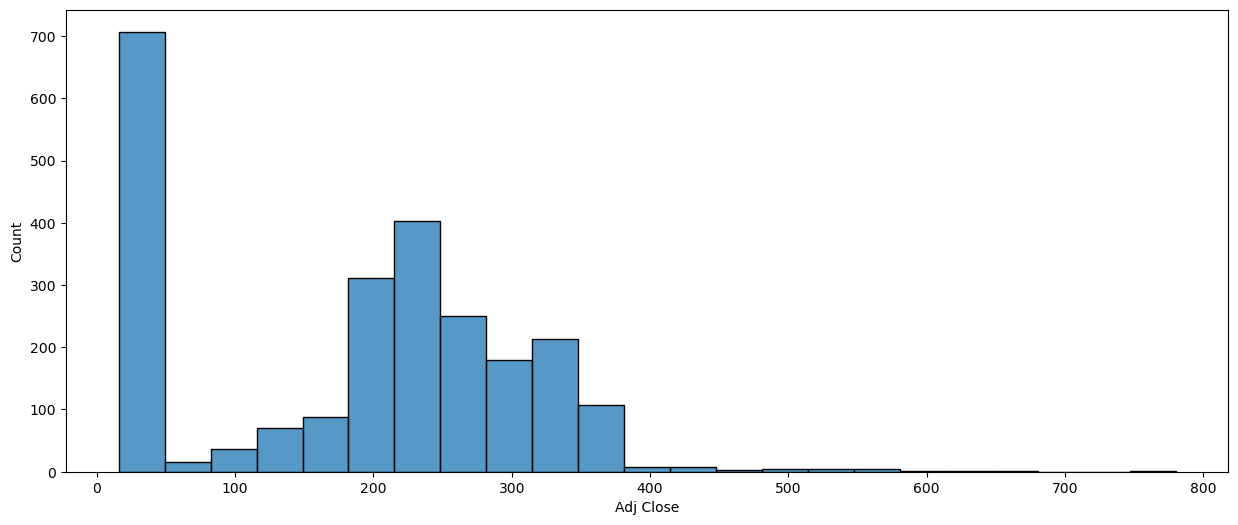

In [25]:
sns.histplot(df, x='Adj Close')
plt.show()

In [26]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [27]:
df['Open'] = df['Open'].astype(int)
df['High'] = df['High'].astype(int)
df['Low'] = df['Low'].astype(int)
df['Close'] = df['Close'].astype(int)
df['Adj Close'] = df['Adj Close'].astype(int)
df['Volume'] = df['Volume'].astype(int)

In [28]:
df['Open'].isin(['High', 'Low'])

0       False
1       False
2       False
3       False
4       False
        ...  
2411    False
2412    False
2413    False
2414    False
2415    False
Name: Open, Length: 2416, dtype: bool

In [29]:
df['Open'].max()

673

In [30]:
df['Open'].min()

16

In [31]:
df['Close'].max()

780

In [32]:
df['Close'].min()

15

<AxesSubplot:>

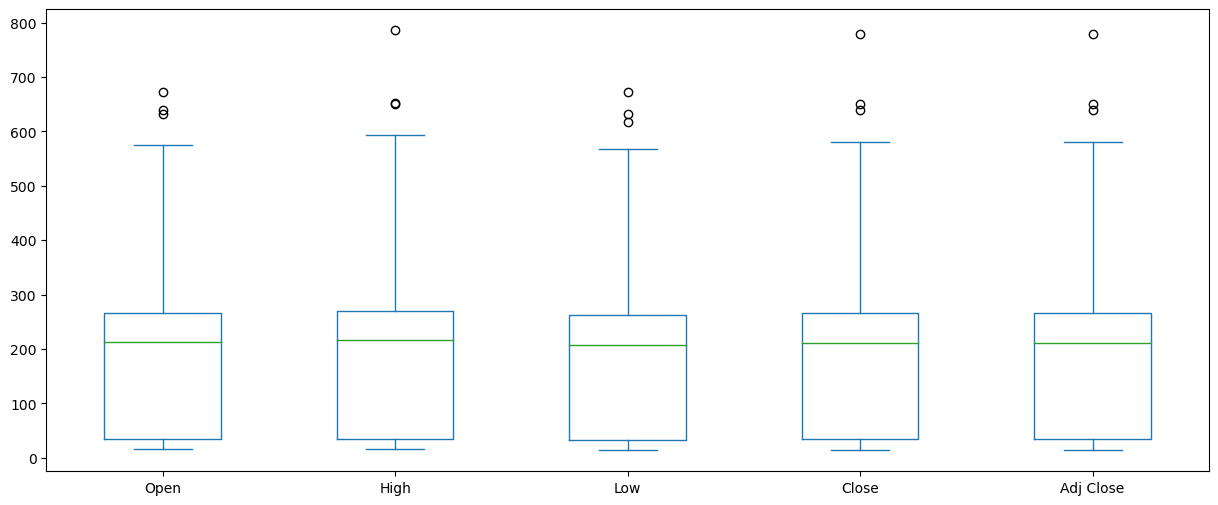

In [33]:
df[['Open','High','Low','Close','Adj Close']].plot(kind='box')


In [34]:
df['Close'].min()

15

In [35]:
# Assuming having a DataFrame with 'Date' and 'Price' columns
data = {
    'Date': ['2023-01-01', '2023-01-02', '2023-01-03'],
    'Price': [700.0, 720.0, 730.0]
}

df = pd.DataFrame(data)

In [36]:
# Create a scatter plot
plot = go.Figure(data=[
    go.Scatter(x=df['Date'], y=df['Price'], mode='lines+markers', name='Tesla Stock Price')
])

In [37]:
# Set the layout
layout = go.Layout(
    title='Stock Prices of Tesla',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

plot.update_layout(layout)

# Show the plot
plot.show()








In [38]:
# Building the regression model
from sklearn.model_selection import train_test_split

#For preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [44]:
#Split the data into train and test sets
X = np.array(df.index).reshape(-1, 1)
Y =df['Close'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)






In [45]:
# Feature scaling
scaler = StandardScaler().fit(X_train)

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
#Creating a linear model
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [48]:
#Plot actual and predicted values for train dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
tesla_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=tesla_data, layout=layout)

# Show the plot
plot2.show()

In [49]:
#Calculate scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''
print(scores)



Metric           Train                Test        
r2_score  0.788228331751714	0.8024543287892049
MSE       3018.796360995388	2768.704187535219

